In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings("ignore")


In [3]:
data = pd.read_csv('data.csv')
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
# checking NULL values
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [6]:
data['Region_Code'].value_counts()

Region_Code
28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1008
44.0       808
42.0       591
52.0       267
51.0       183
Name: count, dtype: int64

EDA :
- Start with EDA on categorical features and then continuos and a combination of categorical and continuos.
- Categorical : ['Gender', 'Vehicle_Age', 'Driving_License', Previously_Insured, 'Vehicle_Damage', 'Policy_Sales_Channel', 'Region_Code']
- Numerical : ['Age', 'Annual_Premium', 'Vintage']

In [7]:
df = data.copy()


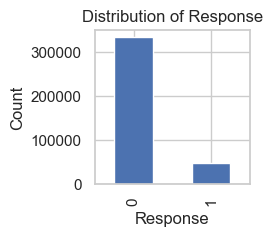

In [8]:
plt.figure(figsize = (2,2))
df['Response'].value_counts().plot(kind = 'bar')
plt.ylabel('Count')
plt.xlabel('Response')
plt.title('Distribution of Response')
plt.show()

#### Analysis on Age

<Axes: xlabel='Age', ylabel='Count'>

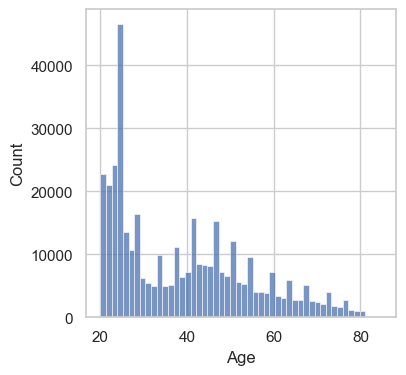

In [9]:
# Distribution of Age
plt.figure(figsize=(4,4))
sns.histplot(x = df['Age'], bins= 50)


#### Annual_Premium Analysis

<Axes: xlabel='Annual_Premium', ylabel='Count'>

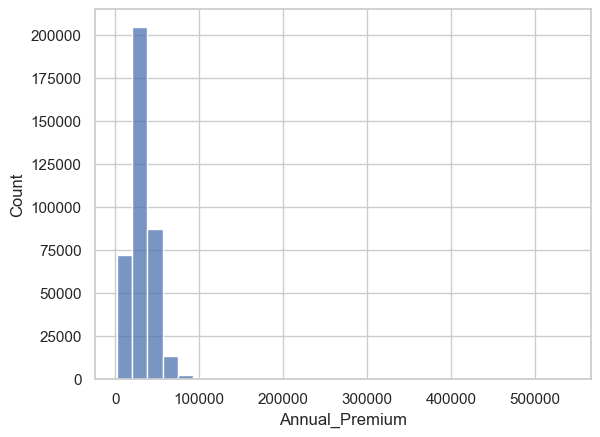

In [10]:
sns.histplot(x =df['Annual_Premium'], bins= 30)

#### Vintage Analysis

<Axes: xlabel='Vintage', ylabel='Count'>

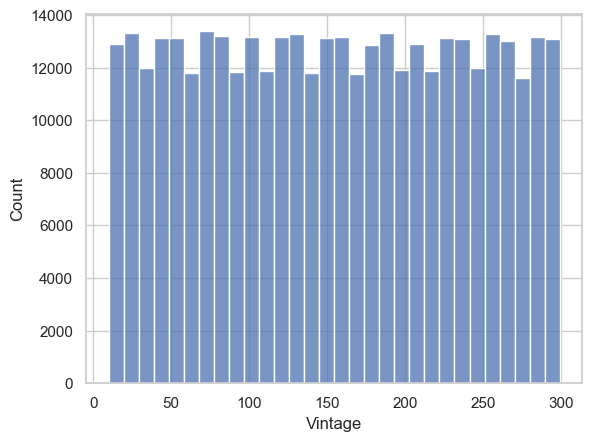

In [11]:
sns.histplot(x = df['Vintage'], bins =30)

#### CATEGORICAL FEATURES ANALYSIS


#### Gender Analysis

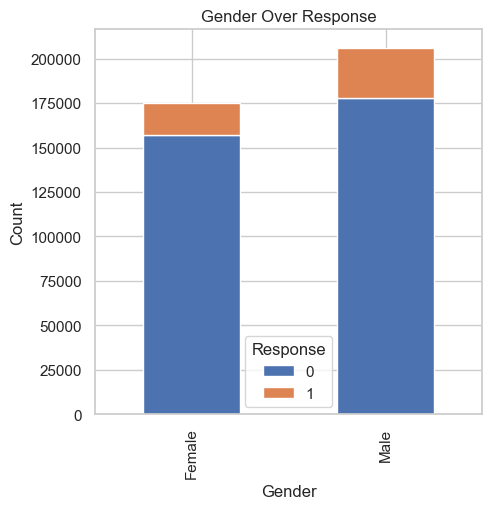

In [12]:
gender_interested = pd.crosstab(df['Gender'], df['Response'])
gender_interested.plot(kind = 'bar', stacked=True, figsize=(5,5))
plt.title('Gender Over Response')
plt.ylabel('Count')
plt.show()

#### Driving_License Analysis

In [13]:
df['Driving_License'].value_counts()


Driving_License
1    380297
0       812
Name: count, dtype: int64

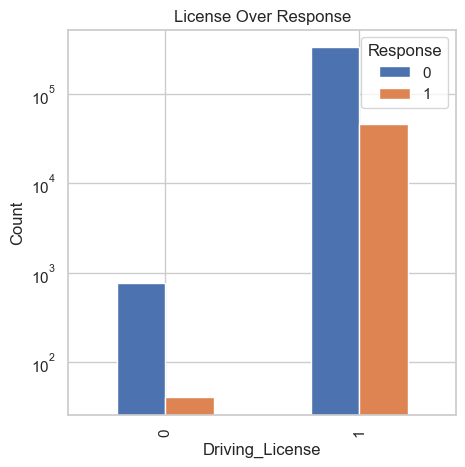

In [14]:
license_interested = pd.crosstab(df['Driving_License'], df['Response'])
l_i = license_interested.plot(kind = 'bar', stacked=False, figsize=(5,5))
#Scaling due to huge count difference
l_i.set_yscale('log')
plt.title('License Over Response')
plt.ylabel('Count')
plt.show()

#### Vehicle_Age

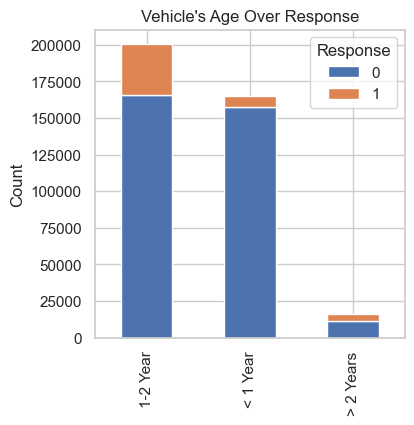

In [15]:
vehicle_age_interested = pd.crosstab(df['Vehicle_Age'], df['Response'])
vehicle_age_interested.plot(kind = 'bar', stacked=True, figsize=(4,4))

plt.title('Vehicle\'s Age Over Response')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

#### Vehicle_Damage

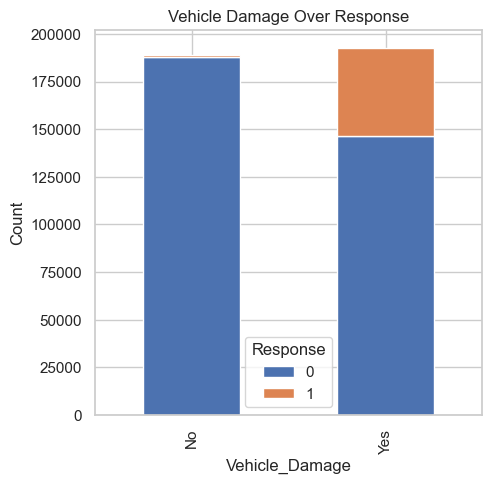

In [16]:
vehicle_damage_interested = pd.crosstab(df['Vehicle_Damage'], df['Response'])
vehicle_damage_interested.plot(kind = 'bar', stacked=True, figsize=(5,5))
# v_d.set_yscale('log')
plt.title('Vehicle Damage Over Response')
plt.ylabel('Count')
plt.show()

#### Previously_Insured Analysis


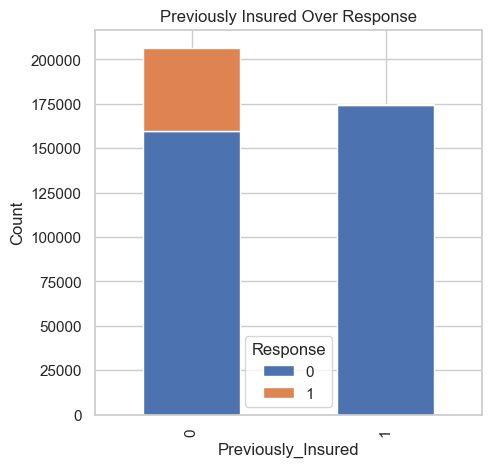

In [17]:
prev_in_interested = pd.crosstab(df['Previously_Insured'], df['Response'])
prev_in_interested.plot(kind = 'bar', stacked=True, figsize=(5,5))
# p_i.set_yscale('log')
plt.title('Previously Insured Over Response')
plt.ylabel('Count')
plt.show()

In [18]:
x = df[(df['Previously_Insured'] ==1) & (df['Response'] == 1)]
x.shape[0]

158

### Data Preprocessing

In [19]:
df.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


- Drop id
- Label encode Gender, Vehicle_Damage
- One Hot Encode Vehicle_Age
- Frequency Encode Region_Code, Policy_Sales_Channel
- StandardScaler for numerical (MinMax Scaler for Annual_Premium)
- TrainTest Split
- RandomForestClassifier, GridSearch


In [20]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0}).astype(int)
df.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


In [21]:
df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'Yes': 0, 'No':1})
df.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,0,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1-2 Year,1,33536.0,26.0,183,0


In [22]:
# One Hot Encoding
df = pd.get_dummies(df, columns=['Vehicle_Age'], drop_first=True)
df.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,1,44,1,28.0,0,0,40454.0,26.0,217,1,False,True
1,2,1,76,1,3.0,0,1,33536.0,26.0,183,0,False,False


In [23]:
df = df.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
df['Vehicle_Age_lt_1_Year'] = df['Vehicle_Age_lt_1_Year'].astype('int')
df['Vehicle_Age_gt_2_Years'] = df['Vehicle_Age_gt_2_Years'].astype('int')


In [24]:
for col in df.columns:
    print(f"{col} >> {df[col].dtype}")

id >> int64
Gender >> int64
Age >> int64
Driving_License >> int64
Region_Code >> float64
Previously_Insured >> int64
Vehicle_Damage >> int64
Annual_Premium >> float64
Policy_Sales_Channel >> float64
Vintage >> int64
Response >> int64
Vehicle_Age_lt_1_Year >> int64
Vehicle_Age_gt_2_Years >> int64


In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

num_features = ['Age', 'Vintage', 'Annual_Premium']

ss = StandardScaler()
df[num_features[:-1]] = ss.fit_transform(df[num_features[:-1]])

mms = MinMaxScaler()

df[[num_features[-1]]] = mms.fit_transform(df[[num_features[-1]]])

id = df['id']
df = df.drop(columns='id')
df.head(2)





,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years
0,1,0.333777,1,28.0,0,0,0.070366,26.0,0.748795,1,0,1
1,1,2.396751,1,3.0,0,1,0.057496,26.0,0.342443,0,0,0


In [41]:
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN


y = df['Response']
X = df.drop(columns='Response')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
smt = SMOTEENN(random_state=42, sampling_strategy="minority")
X_train_final, y_train_final = smt.fit_resample(X_train, y_train)
# X_test_final, y_test_final = smt.fit_resample(X_test, y_test)

In [42]:
X.head(2)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years
0,1,0.333777,1,28.0,0,0,0.070366,26.0,0.748795,0,1
1,1,2.396751,1,3.0,0,1,0.057496,26.0,0.342443,0,0


In [43]:
y.head(2)

0    1
1    0
Name: Response, dtype: int64

#### Using RandomizedSearchCV instead of GridSearchCV to find the best parameter combination through random selection

In [44]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

random_search_params = {
    'criterion':['gini', 'entropy'],
    'min_samples_split' : [5, 8, ],
    'min_samples_leaf':[4, 5],
    'n_estimators':[250],
    'max_depth':[6,7,8,9,10]
    # 'class_weight': ['balanced']
    }

classifier = RandomForestClassifier()
model = RandomizedSearchCV(classifier, param_distributions=random_search_params, cv=4, n_iter =30, verbose = 1, random_state=101, n_jobs=-1, scoring='precision')
model.fit(X_train_final, y_train_final)


Fitting 4 folds for each of 30 candidates, totalling 120 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [6, 7, 8, 9, 10],
                                        'min_samples_leaf': [4, 5],
                                        'min_samples_split': [5, 8],
                                        'n_estimators': [250]},
                   random_state=101, scoring='precision', verbose=1)

In [45]:
best_params = model.best_params_
print(f"Best Hyperparameters Found :{best_params}")


Best Hyperparameters Found :{'n_estimators': 250, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_depth': 10, 'criterion': 'gini'}


In [46]:
from sklearn.metrics import classification_report

y_prediction = model.predict(X_test)
print(classification_report(y_test, y_prediction))


              precision    recall  f1-score   support

           0       0.99      0.66      0.79     83603
           1       0.28      0.93      0.43     11675

    accuracy                           0.69     95278
   macro avg       0.63      0.79      0.61     95278
weighted avg       0.90      0.69      0.75     95278

